# Arboles de decisión

## Física Computacional I

Elaborado por Ph.D. Santiago Echeverrri Arteaga

In [3]:
#QUITAR LOS WARNINGS
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#TREES
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#MODEL SELECTION
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split

#MÉTRICAS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn import metrics


#BARRA DE PROGRESO DE LOS FOR
from tqdm import tqdm

#MÉTODOS DE ENSAMBLE
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#VARIAS
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline

In [1]:
def plot_decision_tree(model, feature_names, nombre='Tree.png', dpi=1200):
    plt.subplots(figsize=(25, 20)) 
    tree.plot_tree(model, 
                       feature_names=feature_names,  
                       filled=True, class_names=True)
    plt.savefig(nombre, format=None, dpi=dpi)
    plt.show()

## Decision Trees

### Ejemplo 1: Vinos

In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Wine_Quality_Data.csv", sep=',')

In [7]:
data.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [9]:
data["color"].value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [15]:
data[data.columns[(data.dtypes==np.float64)]]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [16]:
data.shape

(6497, 13)

In [10]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

Color a entero


In [11]:
data['color'] = data.color.replace('white',0).replace('red',1).astype(np.int)

In [13]:
[x for x in data.columns if x not in 'color']

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [14]:
# Nombre de variables independientes
feature_cols = [x for x in data.columns if x not in 'color']

In [37]:
def pares(N):
    n=0
    while n<N:
        yield(n)
        n+=2

In [48]:
p = pares(200000)
print(next(p))
print(next(p))
print(next(p))
print(next(p))

0
2
4
6


In [49]:
# Split estratificado
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)

# Índices de los conjuntos Entrenamiento/Prueba
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['color']))

# Conjuntos creados
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

In [52]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4495,7.0,0.31,0.39,7.5,0.055,42.0,218.0,0.99652,3.37,0.54,10.3,5
4882,6.6,0.20,0.14,4.4,0.184,35.0,168.0,0.99396,2.93,0.45,9.4,6
5790,7.8,0.27,0.35,1.2,0.050,36.0,140.0,0.99138,3.09,0.45,11.2,5
128,8.0,0.59,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.5,7
1854,6.7,0.26,0.39,1.1,0.040,45.0,147.0,0.99350,3.32,0.58,9.6,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1956,6.1,0.36,0.33,1.1,0.050,24.0,169.0,0.99270,3.15,0.78,9.5,6
1213,9.6,0.38,0.42,1.9,0.071,5.0,13.0,0.99659,3.15,0.75,10.5,6
4469,6.7,0.48,0.32,1.4,0.021,22.0,121.0,0.98890,3.15,0.53,12.7,7
1273,7.5,0.58,0.20,2.0,0.073,34.0,44.0,0.99494,3.10,0.43,9.3,5


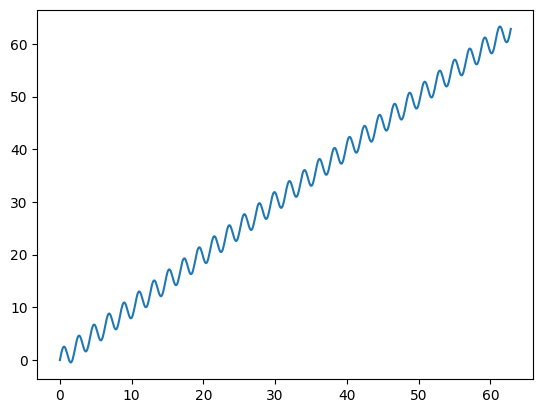

In [23]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0,20*np.pi,800)
y=x+2*np.sin(3*x)
plt.plot(x,y)

#### Parte 1: Clasificación

Verificación del porcentaje de datos en cada conjunto


In [57]:
y_train.value_counts(normalize=True).sort_index()

0    0.753866
1    0.246134
Name: color, dtype: float64

In [58]:
y_test.value_counts(normalize=True).sort_index()

0    0.754
1    0.246
Name: color, dtype: float64

In [62]:
# Construcción del método
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

The number of nodes and the maximum actual depth.


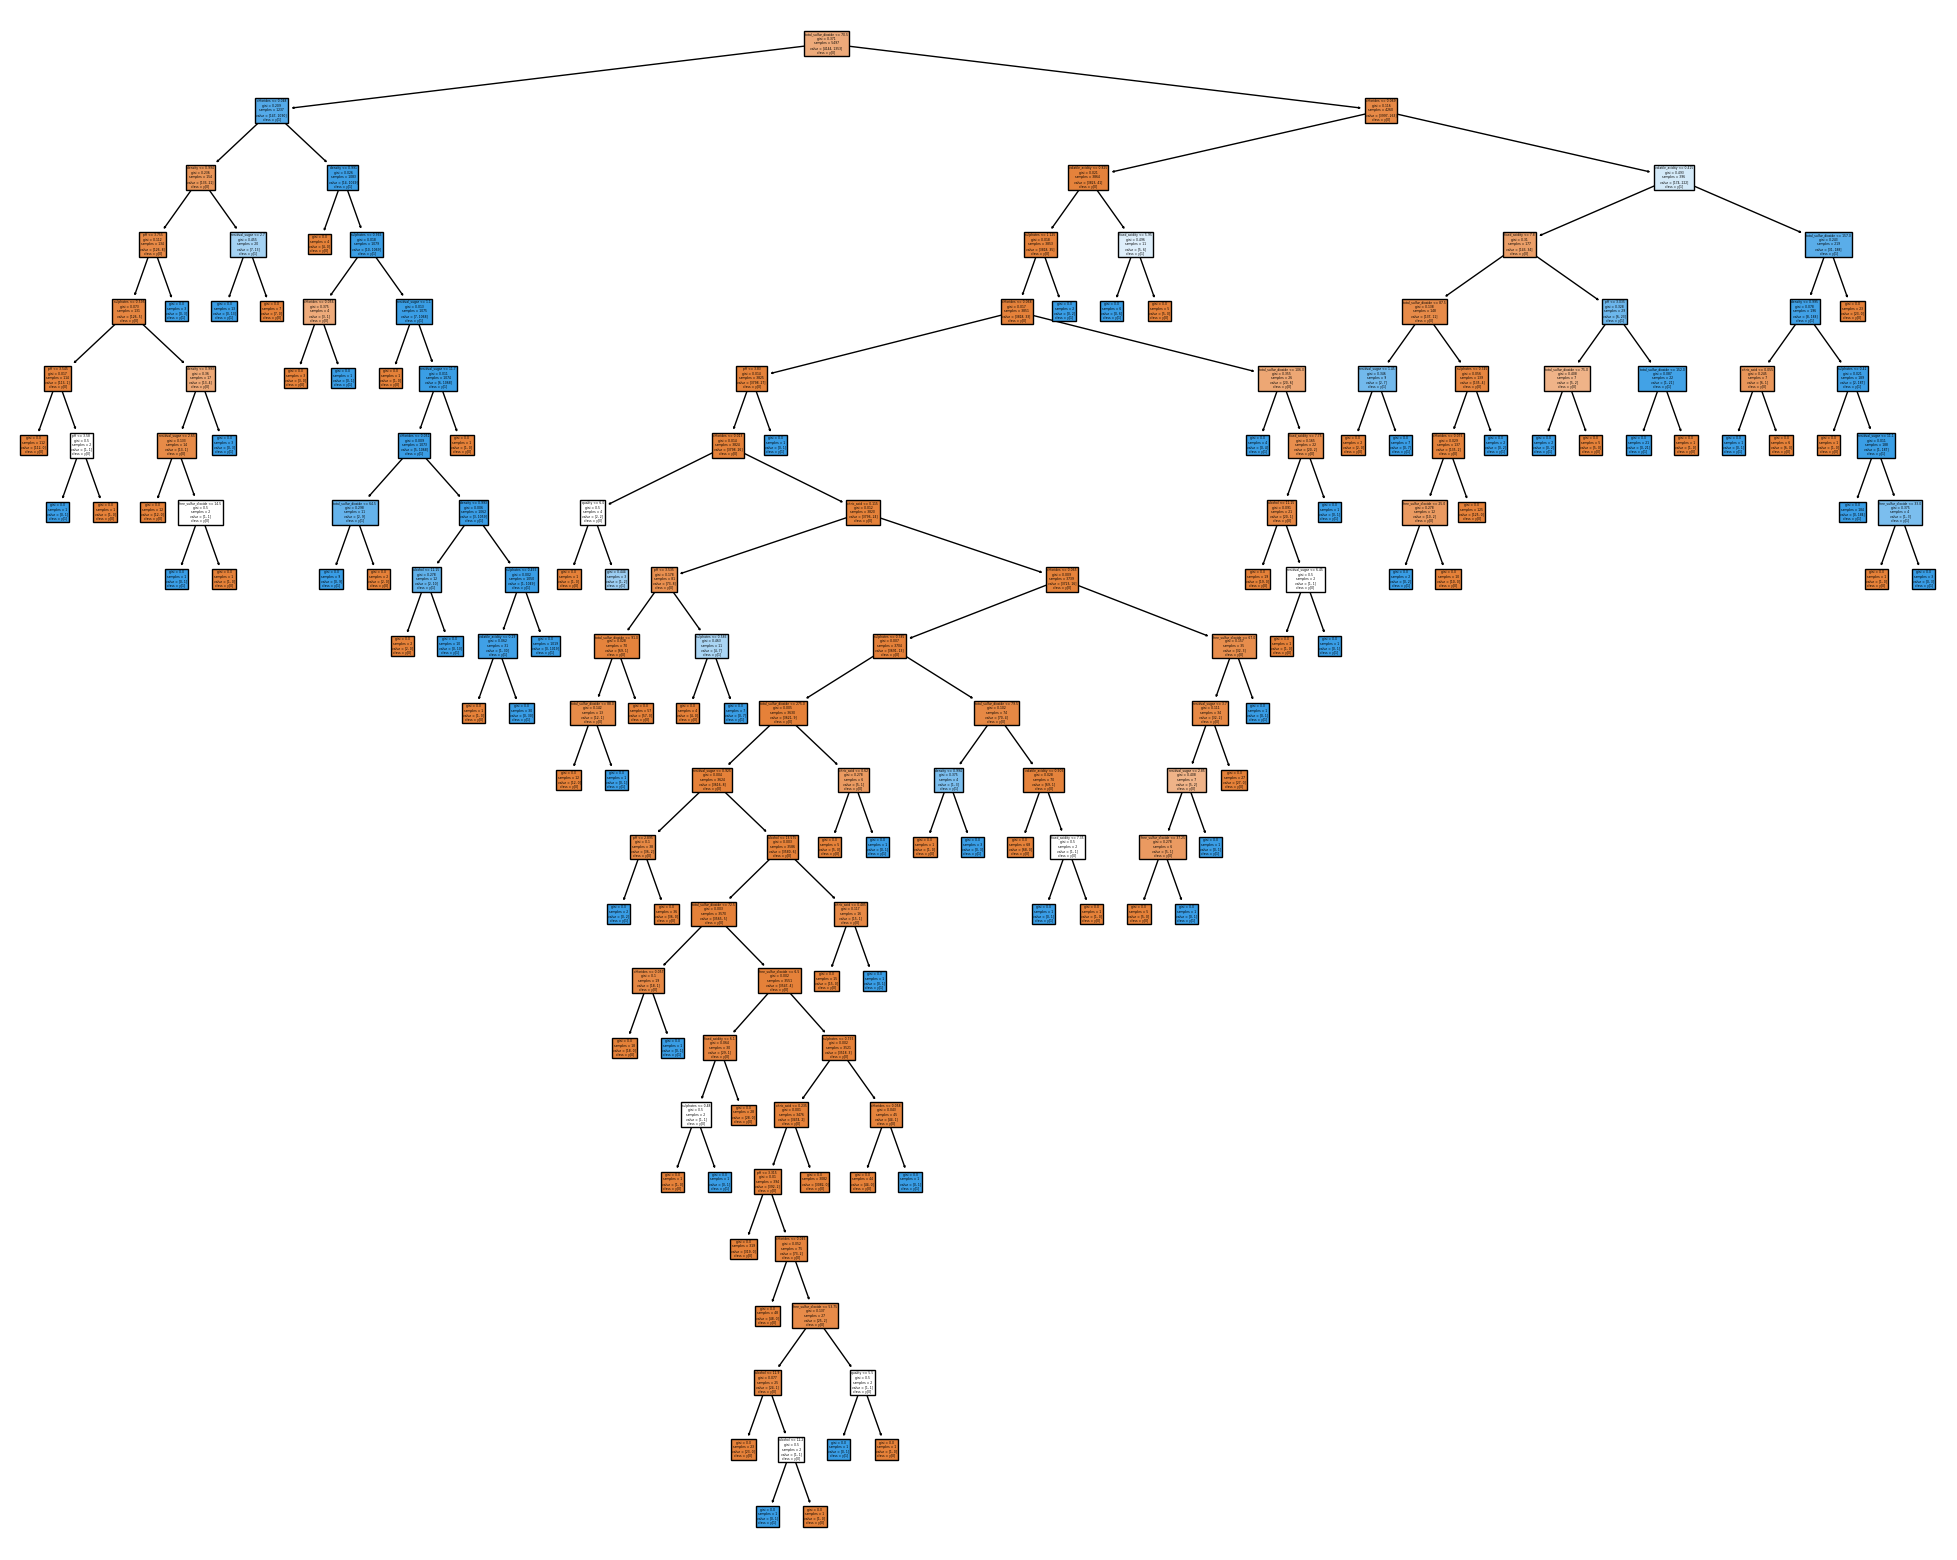

In [68]:
plot_decision_tree(dt, feature_cols, 'Arbol_C.jpg')

In [61]:
dt.tree_.node_count, dt.tree_.max_depth

(171, 22)

Métricas de error

In [69]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

Los arboles de decision predicen un poco mejor los datos de entrenamiento que los datos de prueba, debido a que tienden al sobreajuste


In [70]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,0.999818,0.984000
precision,0.999261,0.963710
recall,1.000000,0.971545
f1,0.999631,0.967611


In [74]:
### Encontrar los mejores parámetros
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1,verbose=1)

GR = GR.fit(X_train, y_train)

Fitting 5 folds for each of 132 candidates, totalling 660 fits


In [75]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(99, 7)

In [76]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [79]:
train_test_gr_error

,train,test
accuracy,0.995816,0.989000
precision,0.998501,0.983539
recall,0.984479,0.971545
f1,0.991440,0.977505


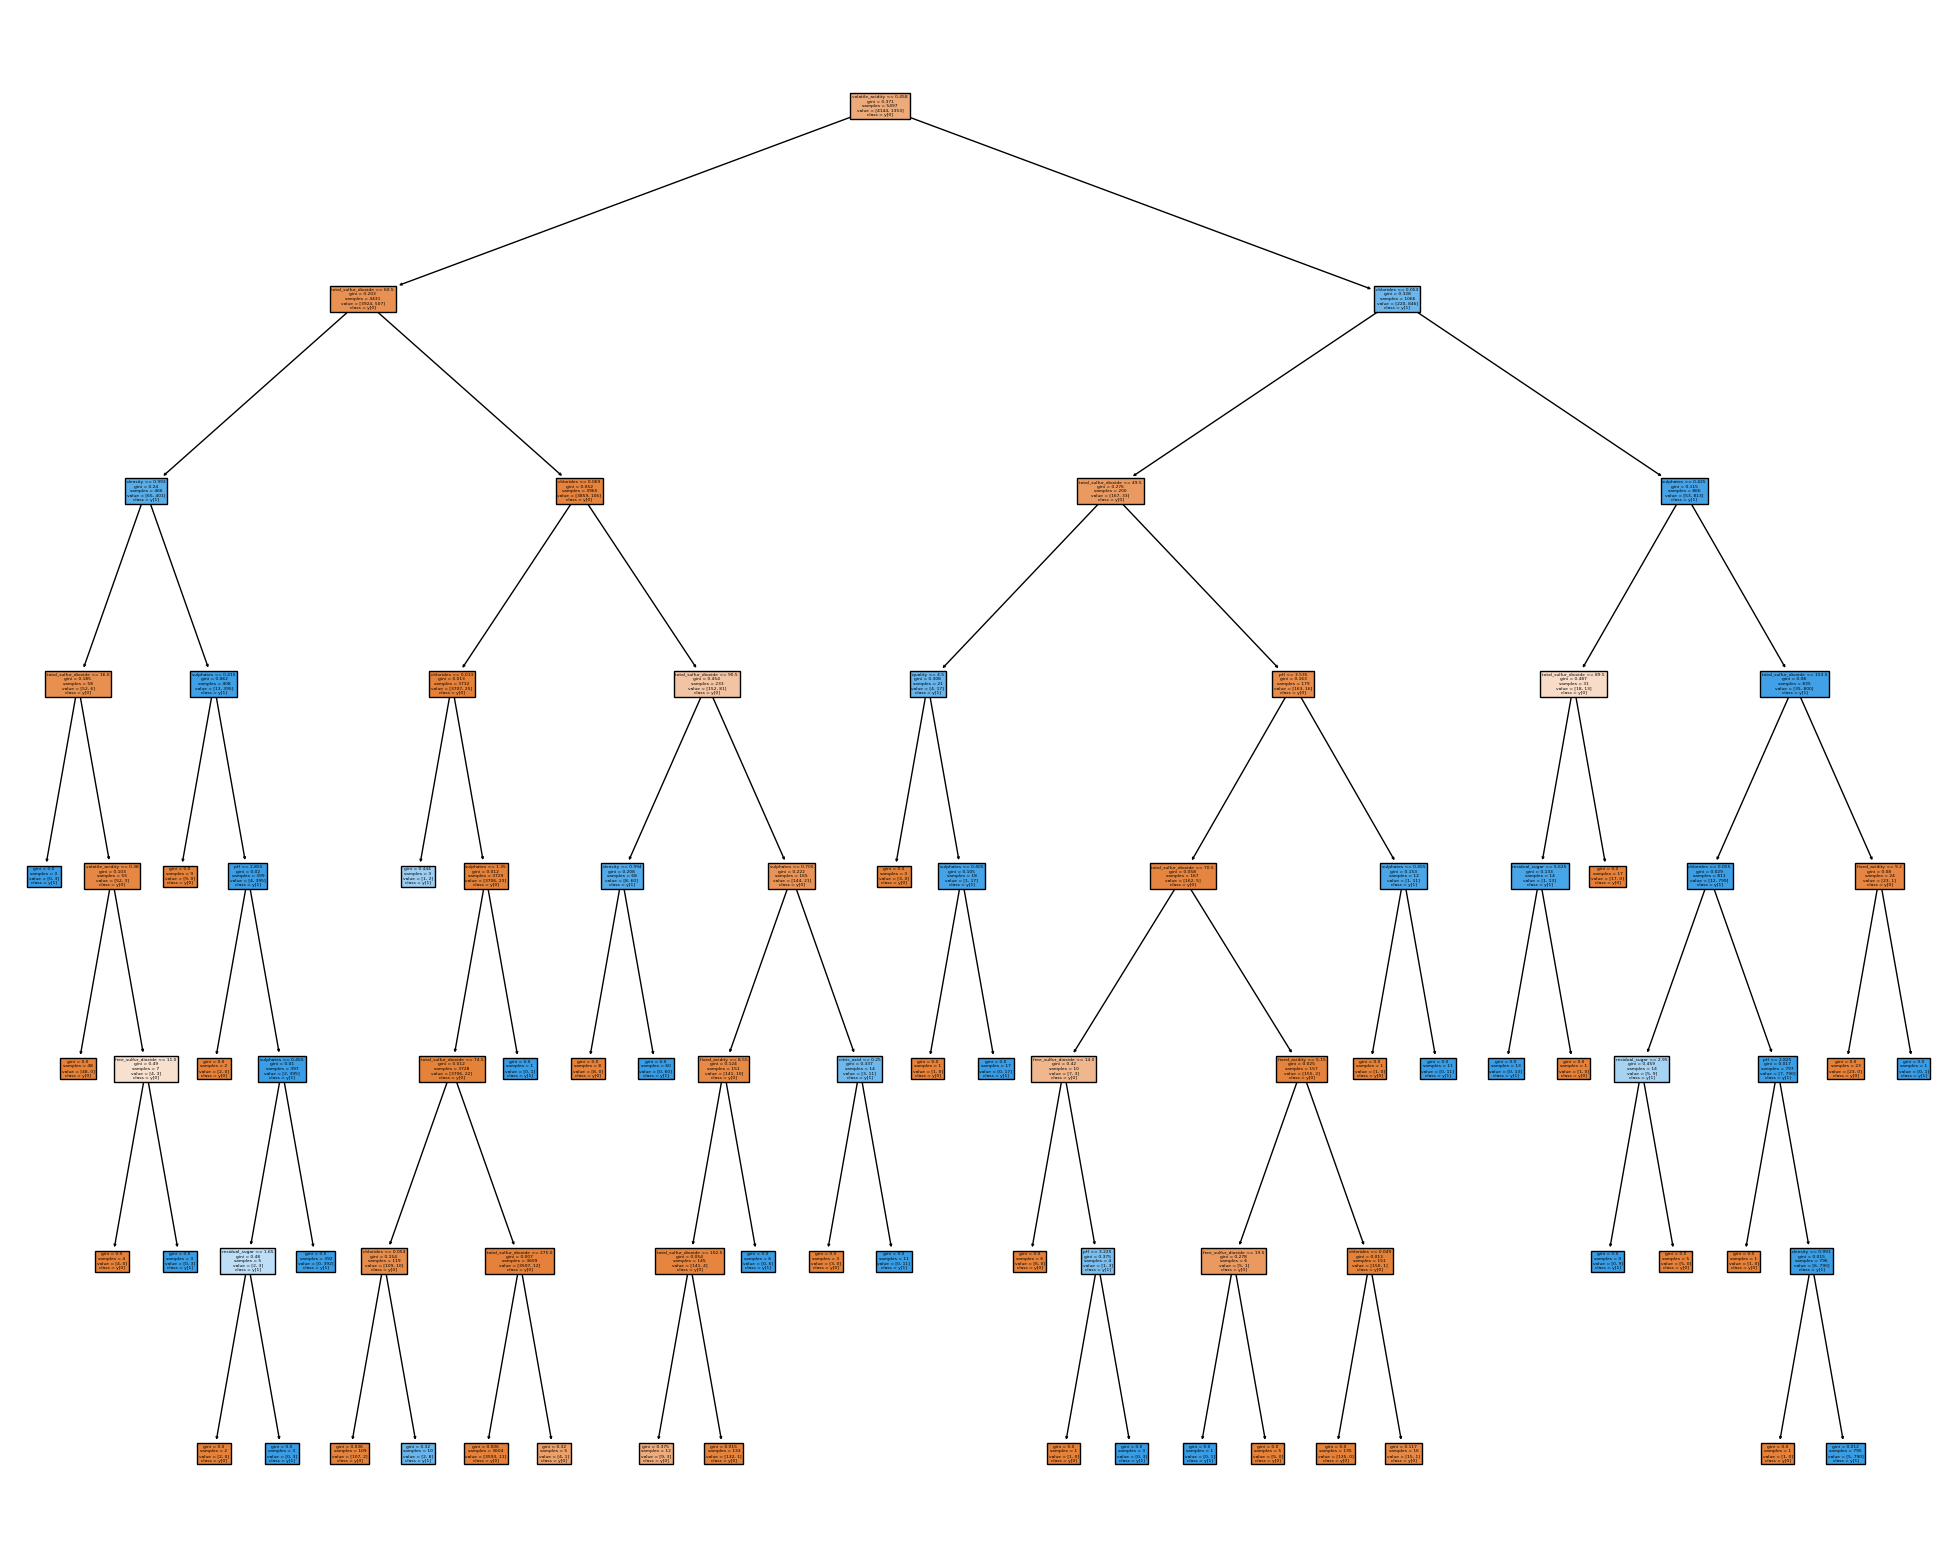

In [78]:
custom_model = DecisionTreeClassifier(**GR.best_params_)
custom_model.fit(X_train, y_train)
preds = custom_model.predict(X_test)
# Plot the decision tree
plot_decision_tree(custom_model, feature_cols, 'Arbol_C.jpg')

#### Parte 2: DecisionTreeRegressor

Usemos `residual_sugar` como la variable a predecir (`y`). *Note:* Los índices de `StratifiedShuffleSplit` se pueden usar nuevamente

In [20]:
#División
feature_cols = [x for x in data.columns if x != 'residual_sugar']

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'residual_sugar']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'residual_sugar']

In [21]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                      n_jobs=-1)

GR_sugar = GR_sugar.fit(X_train, y_train)

In [22]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

(7953, 25)

In [23]:
y_train_pred_gr_sugar = GR_sugar.predict(X_train)
y_test_pred_gr_sugar  = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr_sugar),
                                         'test':  mean_squared_error(y_test, y_test_pred_gr_sugar)},
                                          name='MSE').to_frame().T

train_test_gr_sugar_error

,train,test
MSE,0.00055,2.659874


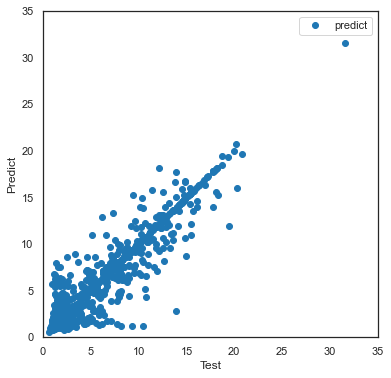

In [24]:
sns.set_context('notebook')
sns.set_style('white')
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_pred_gr_sugar}).set_index('test').sort_index()

ph_test_predict.plot(marker='o', ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,35), ylim=(0,35));

**Una forma de visualizar los árboles**

In [14]:
custom_model = DecisionTreeRegressor(**GR_sugar.best_params_)
custom_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25, max_features=10)

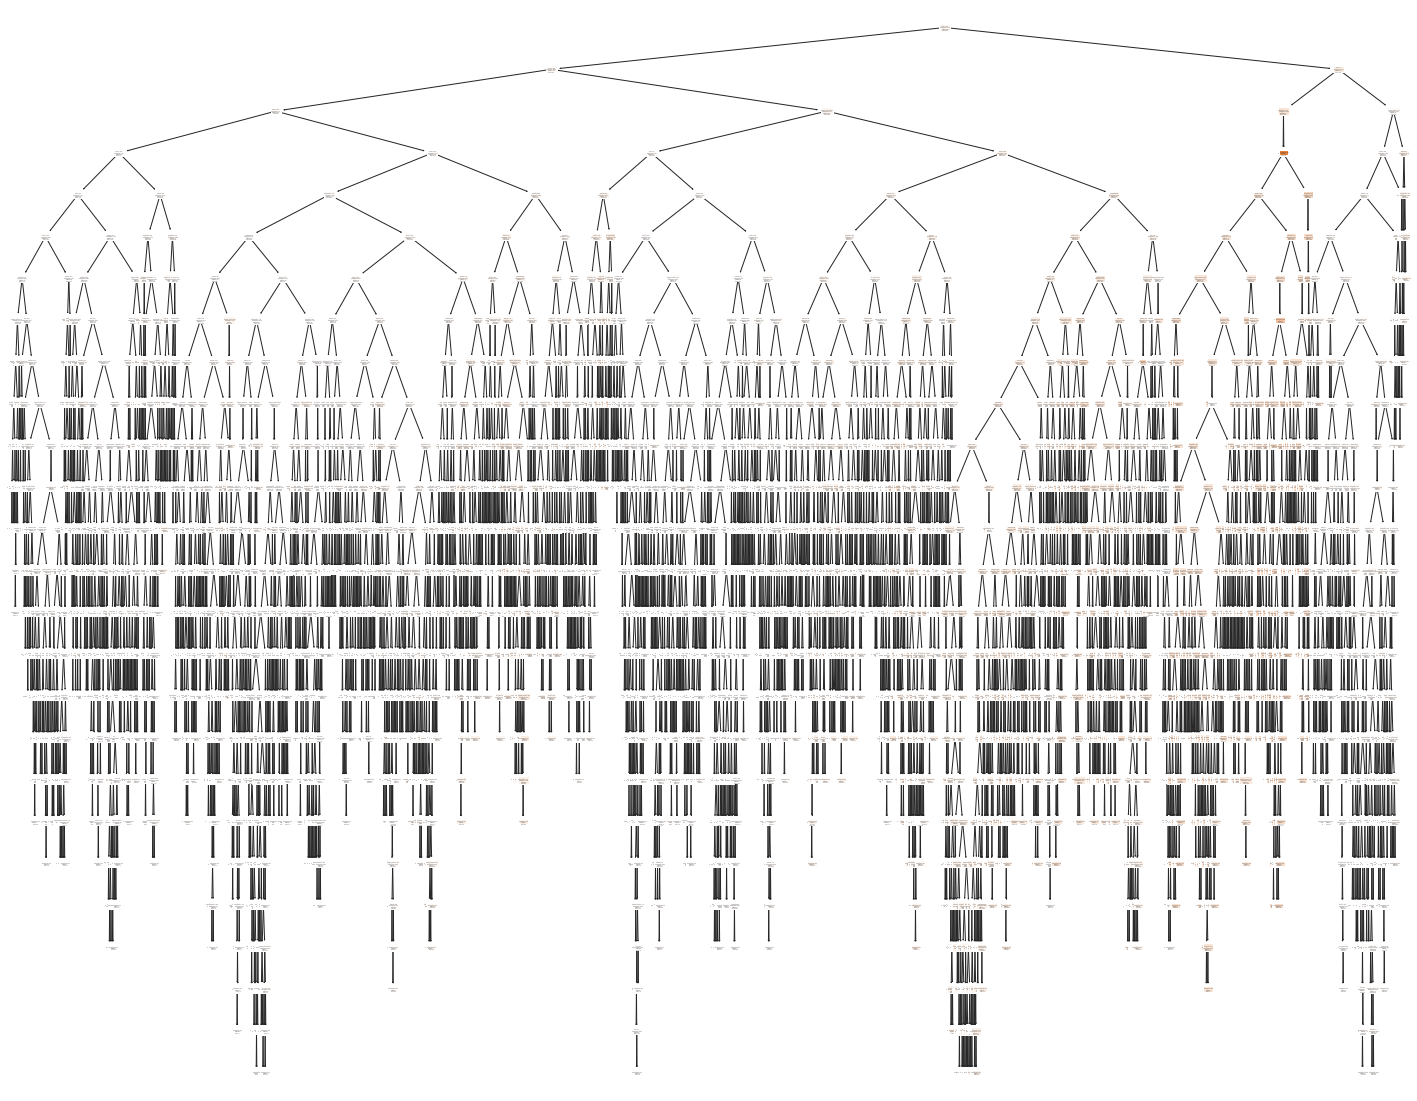

In [15]:
preds = custom_model.predict(X_test)
# Plot the decision tree
plot_decision_tree(custom_model, feature_cols, 'Regressor.jpg', 300)

### Ejemplo 2: Cancer

In [26]:
rs = 123

In [25]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/tumor.csv"
tumor_df = pd.read_csv(dataset_url)

In [27]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [28]:
# Get the input features
X = tumor_df.iloc[:, :-1]
# Get the target variable
y = tumor_df.iloc[:, -1:]

In [29]:
# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [30]:
# Train a decision tree with all default arguments
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)

In [31]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [32]:
pd.Series(evaluate_metrics(y_test, preds))

accuracy     0.956204
recall       0.958333
precision    0.920000
f1score      0.938776
dtype: float64

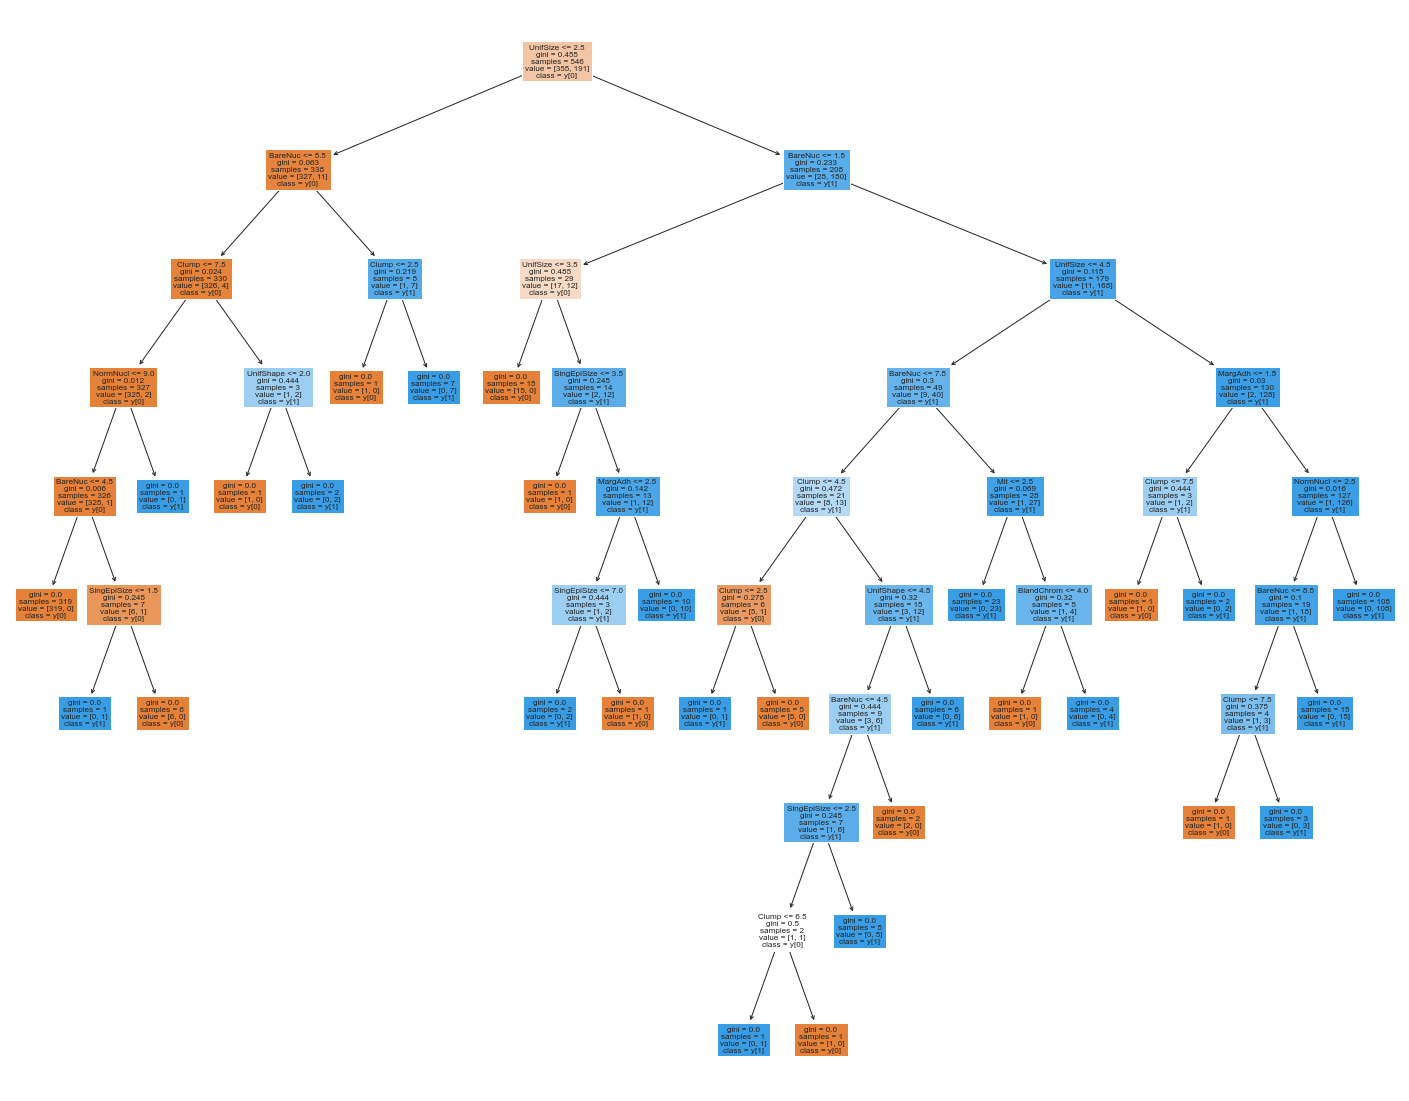

In [25]:
feature_names = X.columns.values
plot_decision_tree(model, feature_names, 'Cancer1.jpg', 500)

**Regularización y ajuste de parámetros**

In [33]:
custom_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3, random_state=rs)

In [34]:
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
pd.Series(evaluate_metrics(y_test, preds))

accuracy     0.963504
recall       0.916667
precision    0.977778
f1score      0.946237
dtype: float64

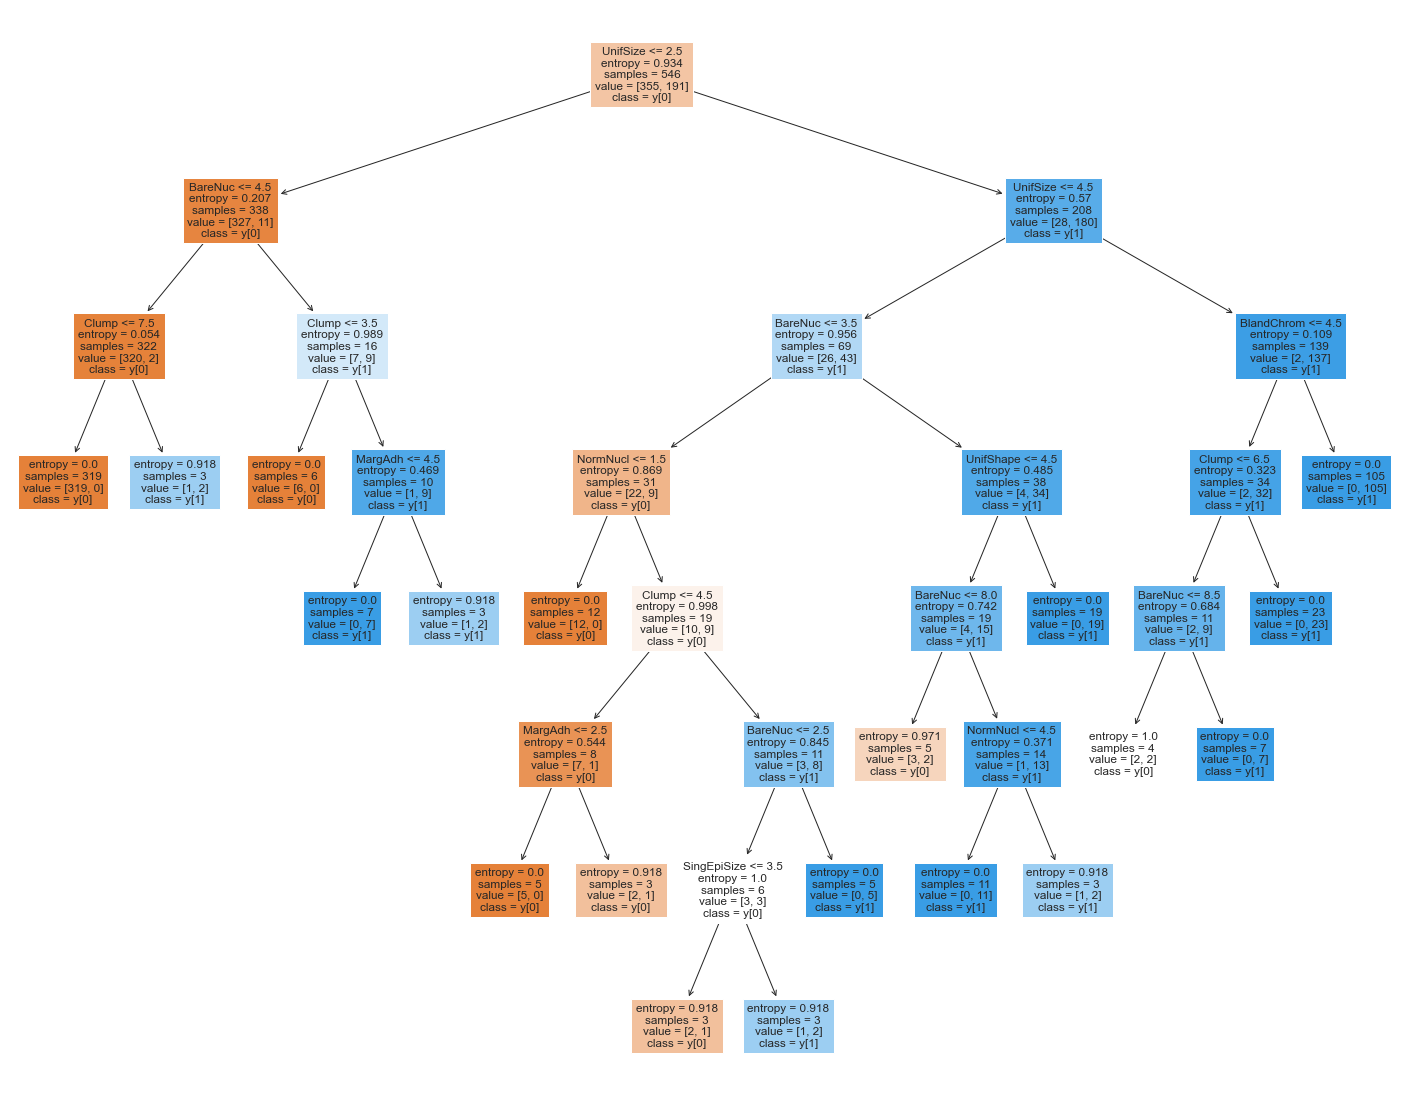

In [28]:
plot_decision_tree(custom_model, feature_names, 'Cancer2.jpg',500)

In [35]:
custom_model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=5, random_state=rs)
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
pd.Series(evaluate_metrics(y_test, preds))

accuracy     0.970803
recall       0.979167
precision    0.940000
f1score      0.959184
dtype: float64

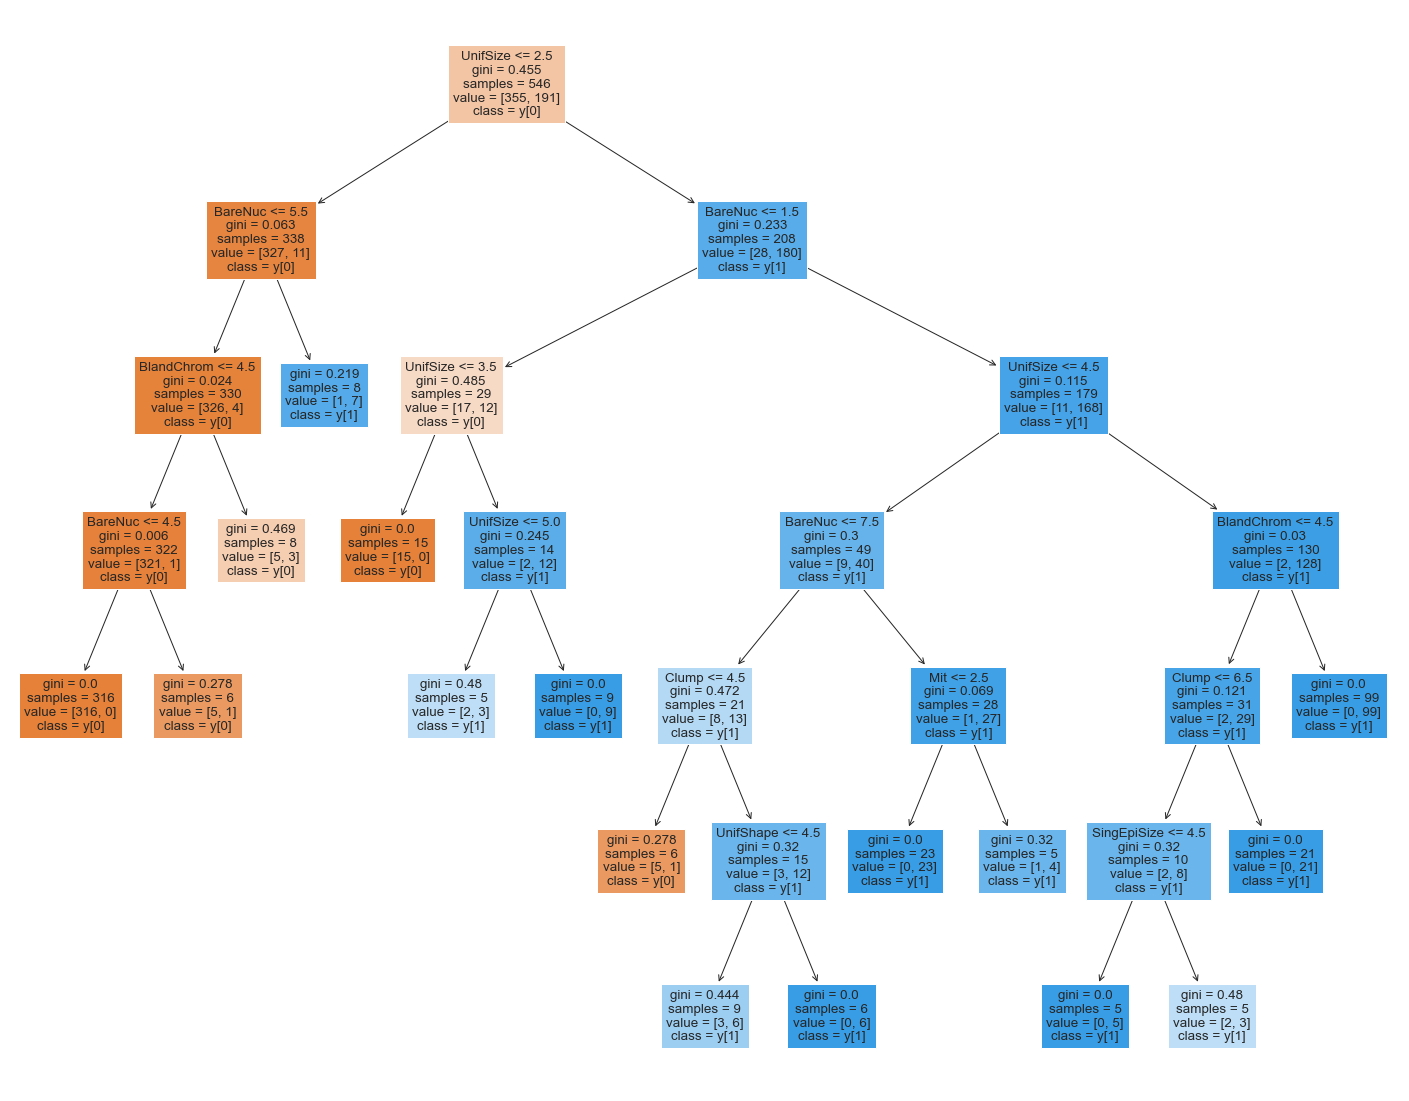

In [34]:
plot_decision_tree(custom_model, feature_names, 'Cancer3.jpg',500)

**Hiperparámetros**

In [36]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}
model = DecisionTreeClassifier(random_state=rs)

In [37]:
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

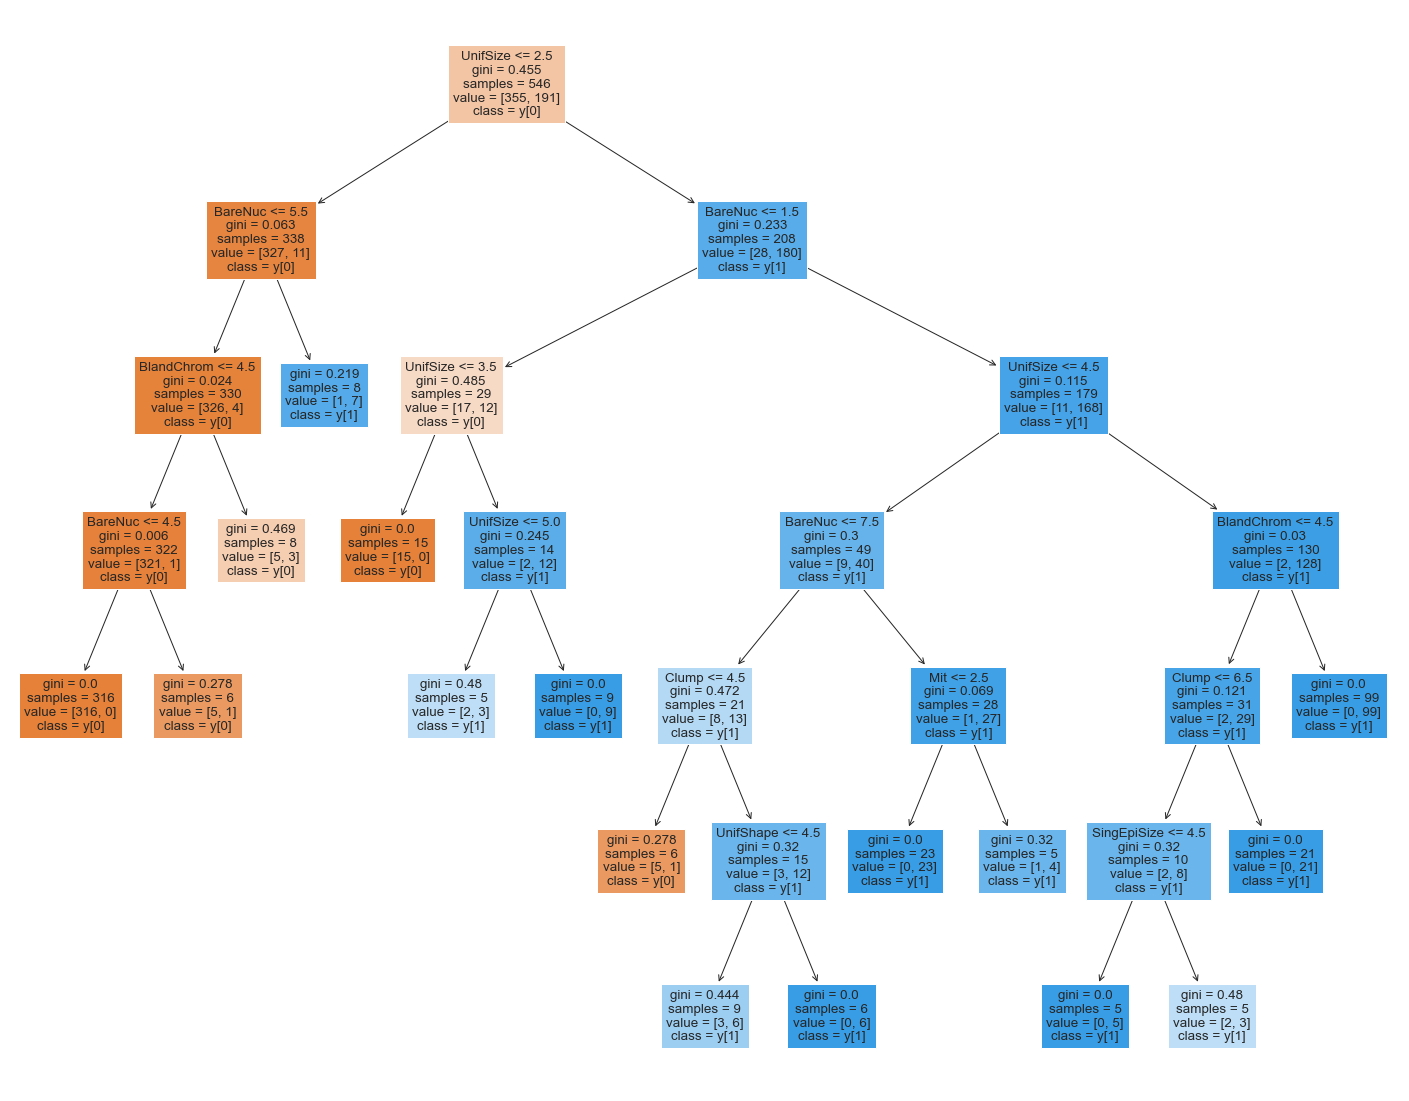

In [38]:
custom_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, random_state=rs)
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
evaluate_metrics(y_test, preds)
# Plot the decision tree
plot_decision_tree(custom_model, feature_names, 'Cancer4.jpg',500)

## Bagging y Random Trees

In [38]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),
             "train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [39]:
def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators'):
    #Iterate through different number of estimators and average out the results  


    N_estimators=[n for n in range(1,70)]
    times=20
    train_acc=np.zeros((times,len(N_estimators)))
    test_acc=np.zeros((times,len(N_estimators)))
    
    train_time=np.zeros((times,len(N_estimators)))
    test_time=np.zeros((times,len(N_estimators)))
     #average out the results
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            #Iterate through different number of estimators and average out the results   
        
            Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 10),n_estimators=n_estimators,bootstrap=True,random_state=0)
            Bag.fit(X_train,y_train)
            
            Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  Bag)
           
            train_acc[n,n_estimators-1]=Accuracy['train Accuracy']
            test_acc[n,n_estimators-1]=Accuracy['test Accuracy']
        
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(train_acc.mean(axis=0))
    ax2.plot(test_acc.mean(axis=0),c='r')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Training accuracy',color='b')
    ax2.set_ylabel('Testing accuracy', color='r')
    plt.title(title)
    plt.show()

### Bagging

In [40]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [41]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [43]:
from sklearn.utils import resample

In [45]:
churn_df[0:5]

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [51]:
resample(churn_df[0:5])

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1


In [11]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]

X.head()

,tenure,age,address,income,ed,employ,equip
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0


In [12]:
y = churn_df['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (140, 7) (140,)
Test set (60, 7) (60,)


In [14]:
max_depth=5
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=10)
Tree
Tree.fit(X_train,y_train)
yhat = Tree.predict(X_test)
yhat

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [15]:
pd.Series(get_accuracy(X_train, X_test, y_train, y_test,  Tree))

test Accuracy     0.616667
train Accuracy    0.907143
dtype: float64

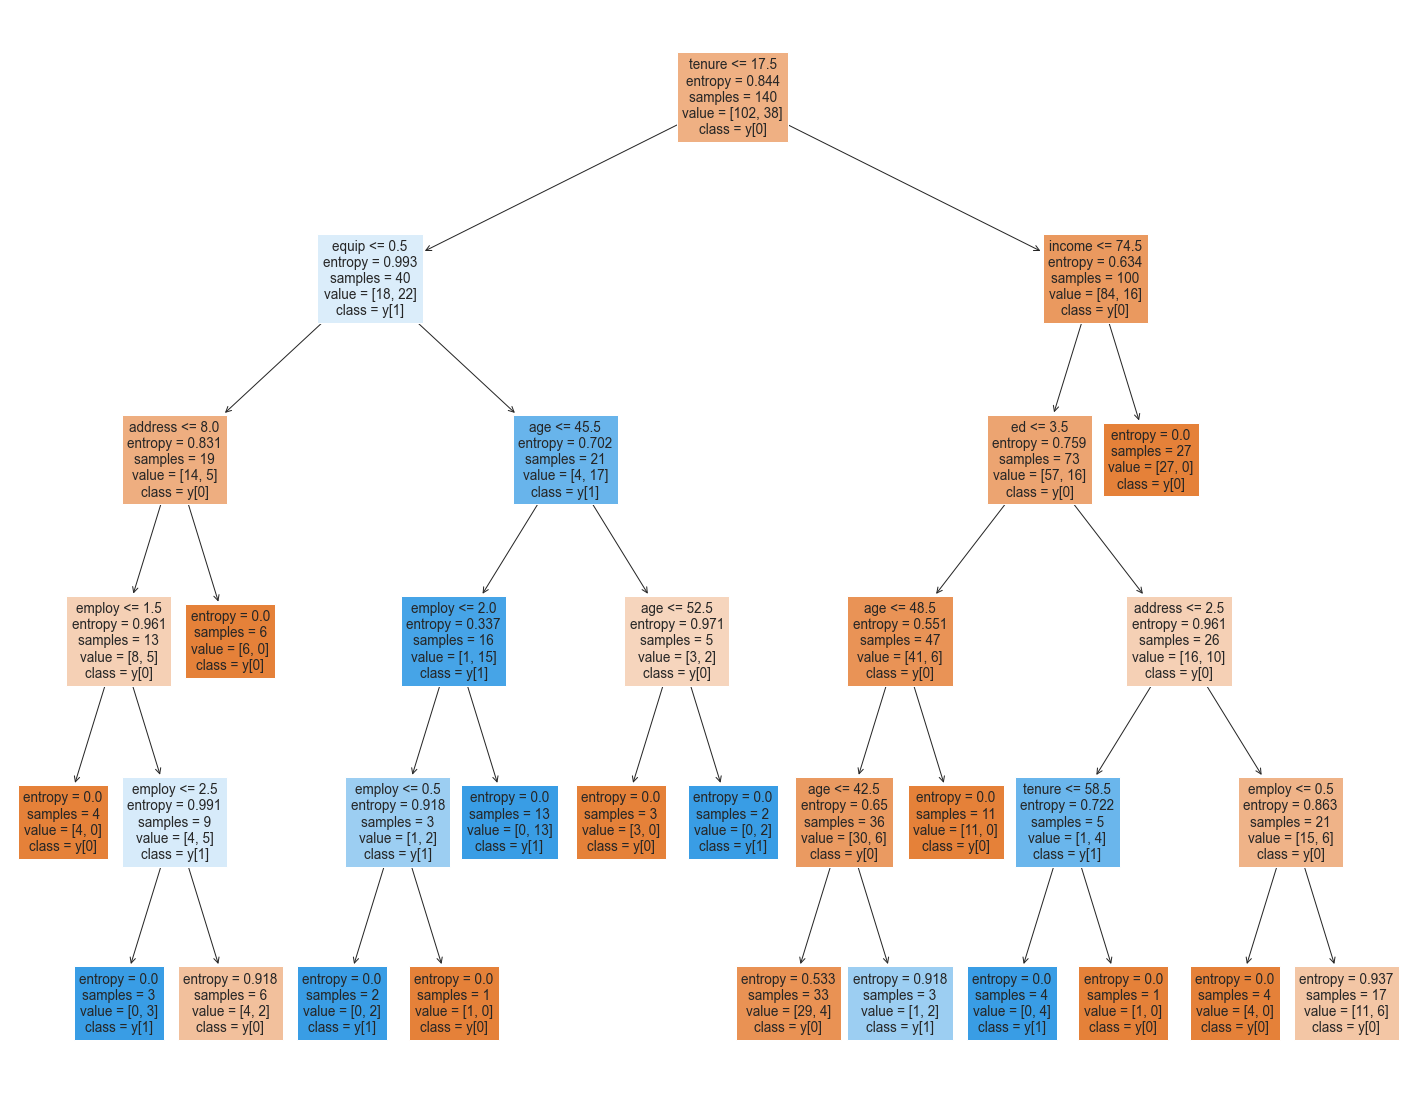

In [57]:
plot_decision_tree(Tree, ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip'], 'Tree_PreBag_1.jpg',300)

**Al cambiar el randomstate va a cambiar el árbol por tener overfitting**

{'test Accuracy': 0.65, 'train Accuracy': 0.9357142857142857}


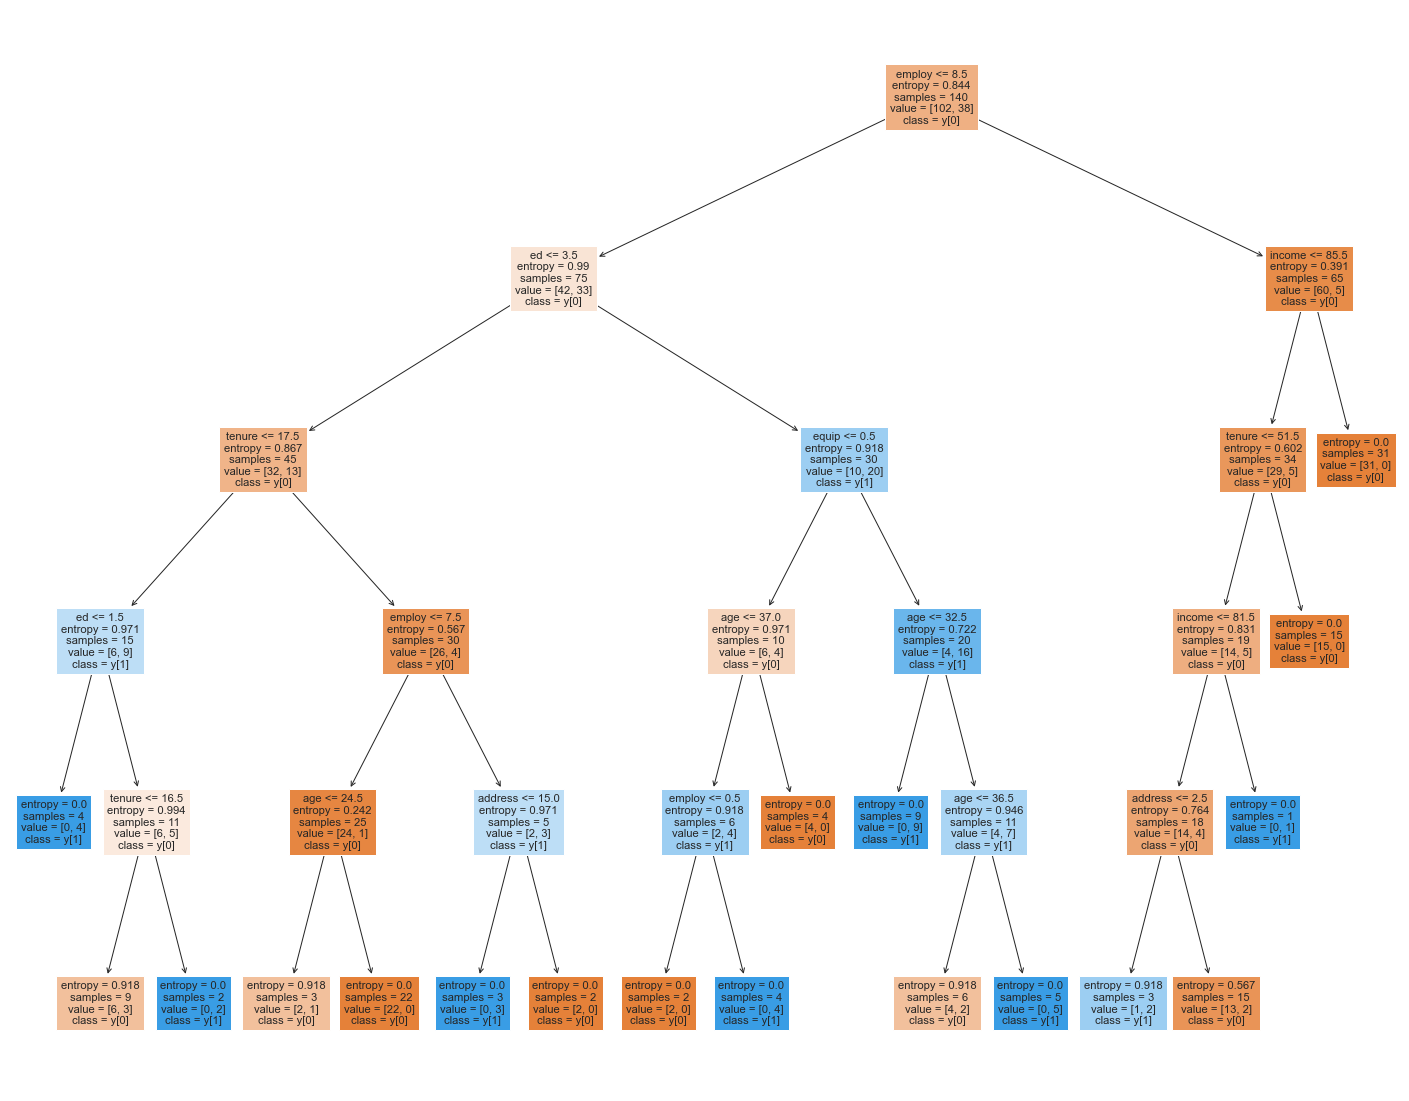

In [58]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=5)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=8)
Tree.fit(X_train,y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  Tree))
plot_decision_tree(Tree, ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip'], 'Tree_PreBag_2.jpg',300)

In [61]:
Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=2)
                        ,n_estimators=30,random_state=0,bootstrap=True)
Bag.fit(X_train,y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

{'test Accuracy': 0.7, 'train Accuracy': 0.9071428571428571}


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:08<00:00,  6.43s/it]


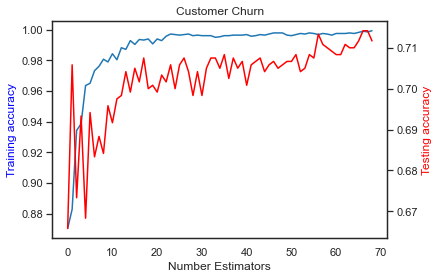

In [62]:
get_accuracy_bag(X, y, "Customer Churn")

### Ejemplo Bagging 2: Cancer

In [6]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
#Remover los datos que tienen ? en la columna BareNuc
df = df[df["BareNuc"] != "?"]
#Selección X y Y
X =  df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = df['Class']
y_norm = y.replace({2:0,4:1})
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [24]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     'base_estimator__max_depth' : [2*n+1 for n in range(10) ] }
Bag = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, bootstrap=True)
search = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='accuracy', cv=3)
%time search.fit(X_train, y_train)
search.best_score_, search.best_params_

CPU times: total: 35.6 s
Wall time: 36.4 s


(0.9688644688644689, {'base_estimator__max_depth': 5, 'n_estimators': 11})

In [25]:
pd.Series(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

test Accuracy     0.970803
train Accuracy    0.985348
dtype: float64

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:24<00:00, 10.22s/it]


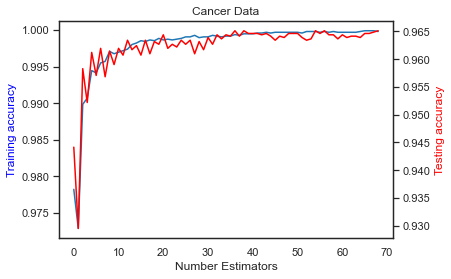

In [69]:
get_accuracy_bag(X, y, "Cancer Data")

In [26]:
param_grid = {'n_estimators': [n for n in range(1,400,25)],
     'max_depth' : [2*n+1 for n in range(10) ] }
Bag = RandomForestClassifier(oob_score=True, 
                            random_state=42,
                            n_jobs=-1)
search = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='accuracy', cv=3)
%time search.fit(X_train, y_train)
search.best_score_, search.best_params_

CPU times: total: 3min 3s
Wall time: 3min 20s


(0.9761904761904763, {'max_depth': 5, 'n_estimators': 126})

In [27]:
pd.Series(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

test Accuracy     0.970803
train Accuracy    0.985348
dtype: float64

In [28]:
# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1, max_depth=7)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

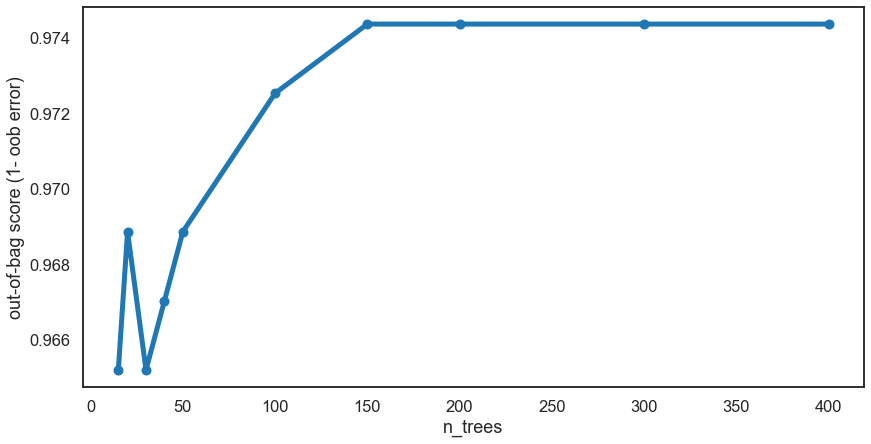

In [29]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag score (1- oob error)');

In [30]:
search.best_score_, search.best_params_

(0.9761904761904763, {'max_depth': 5, 'n_estimators': 126})

Text(0.5, 76.5, 'Ground Truth')

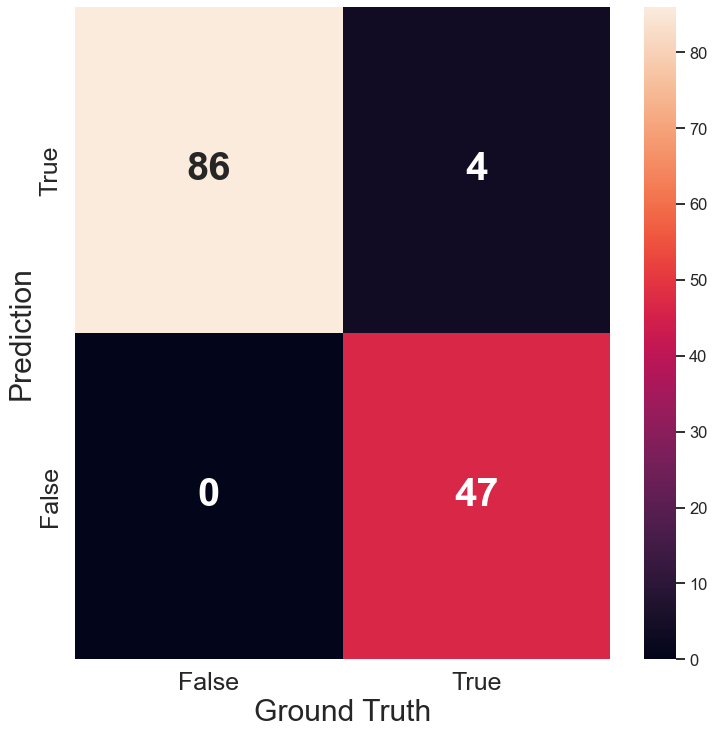

In [43]:
sns.set_context('talk')
y_pred = search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [122]:
y_test=pd.Series(y_test==2).astype(int).value_counts()

In [128]:
y_test.shape

(137,)

In [129]:
y_prob[:,1].shape

(205,)

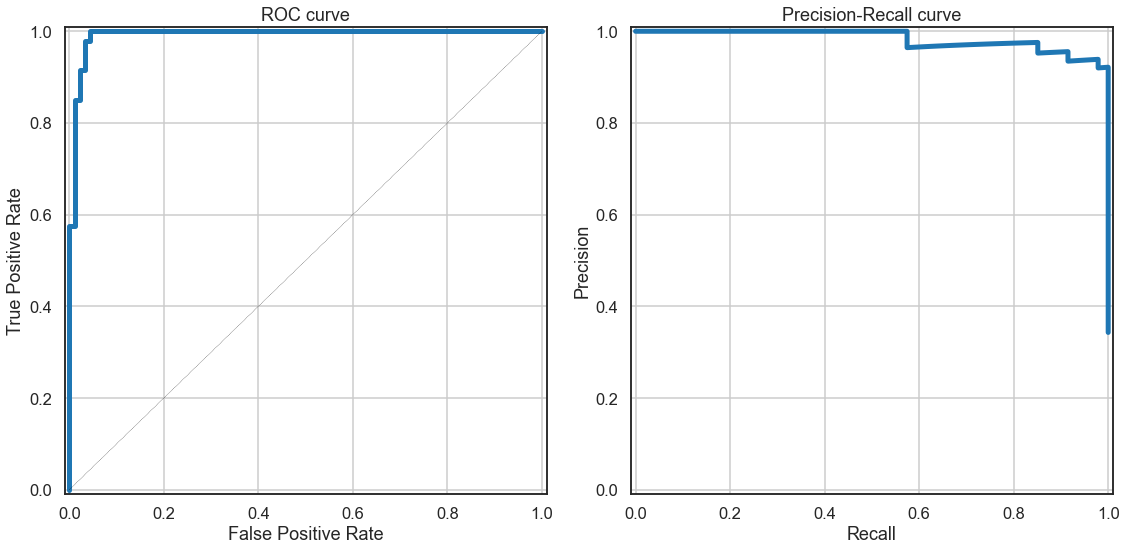

In [34]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = search.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision,  linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

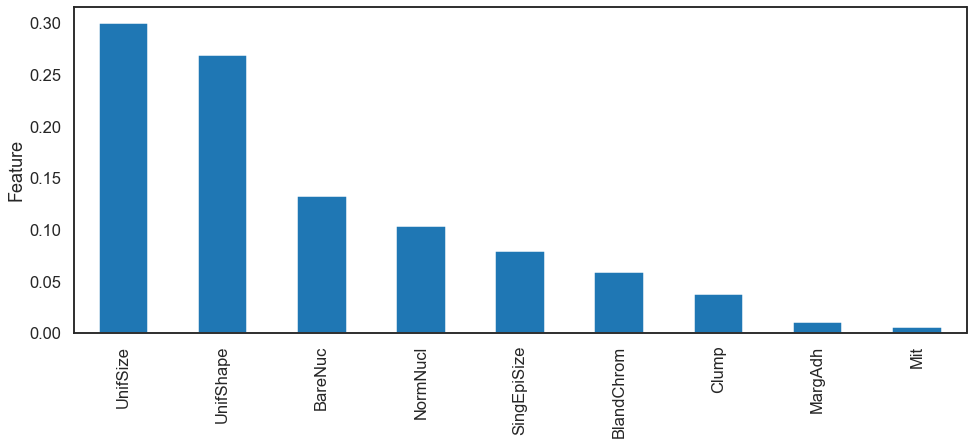

In [42]:
feature_imp = pd.Series(search.best_estimator_.feature_importances_,
                        index=['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');